# Querying online data with astroquery and PyVO

There are two main general packages for accessing online data from Python in the Astropy ecosystem:

* The [astroquery](https://astroquery.readthedocs.io/en/latest/) coordinated package, which offers access to many services, including a number that are not VO compatible.
* The [PyVO](https://pyvo.readthedocs.io/en/latest/) affiliated package which implements a Pythonic interface to VO-compliant services.

In this tutorial, we will take a look at both of these.

In [1]:
#! pip install astroquery -U


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Querying services such as Simbad and ESASky</li>
<li>Using PyVO to access data on VO-compliant servers</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astroquery and PyVO. For more information about the features presented below as well as other available features, you can read the
[astroquery](https://astroquery.readthedocs.io/en/latest/) and [PyVO](https://pyvo.readthedocs.io/en/latest/) documentation.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Using astroquery

Astroquery provides a common interface to the following services:

* ALMA Queries (astroquery.alma)
* Atomic Line List (astroquery.atomic)
* Besancon Queries (astroquery.besancon)
* Cadc (astroquery.cadc)
* CASDA Queries (astroquery.casda)
* CDS MOC Service (astroquery.cds)
* esa.hubble (astroquery.esa.hubble)
* ESASky Queries (astroquery.esasky)
* ESO Queries (astroquery.eso)
* Gaia TAP+ (astroquery.gaia)
* GAMA Queries (astroquery.gama)
* HEASARC Queries (astroquery.heasarc)
* HITRAN Queries (astroquery.hitran)
* IRSA Image Server program interface (IBE) Queries (astroquery.ibe)
* IRSA Queries (astroquery.irsa)
* IRSA Dust Extinction Service Queries (astroquery.irsa_dust)
* JPL Spectroscopy Queries (astroquery.jplspec)
* MAGPIS Queries (astroquery.magpis)
* MAST Queries (astroquery.mast)
* Minor Planet Center Queries (astroquery.mpc/astroquery.solarsystem.MPC)
* NASA ADS Queries (astroquery.nasa_ads)
* NED Queries (astroquery.ned)
* NIST Queries (astroquery.nist)
* NRAO Queries (astroquery.nrao)
* NVAS Queries (astroquery.nvas)
* SIMBAD Queries (astroquery.simbad)
* Skyview Queries (astroquery.skyview)
* Splatalogue Queries (astroquery.splatalogue)
* UKIDSS Queries (astroquery.ukidss)
* Vamdc Queries (astroquery.vamdc)
* VizieR Queries (astroquery.vizier)
* VO Simple Cone Search (astroquery.vo_conesearch)
* VSA Queries (astroquery.vsa)
* xMatch Queries (astroquery.xmatch)

and also provides access to other services.

### Simbad

To start off, we can take a look at the sub-package to query [SIMBAD](http://simbad.u-strasbg.fr/simbad/):

In [3]:
from astroquery.simbad import Simbad

We can query by identifier:

In [4]:
result = Simbad.query_object("M31")
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
M 31,00 42 44.330,+41 16 07.50,7,7,--,--,0,C,I,2006AJ....131.1163S


or by coordinates:

In [5]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [6]:
coord = SkyCoord(5*u.hourangle,30*u.deg,frame='icrs')
rad = 15*u.arcminute

### ESASky

Another example is querying images from [ESASky](https://astroquery.readthedocs.io/en/latest/esasky/esasky.html)

In [7]:
from astroquery.esasky import ESASky

We can list the available catalogs and maps:

In [8]:
ESASky.list_catalogs()

['LAMOST',
 'AllWise',
 'AKARI-IRC-SC',
 'TwoMASS',
 'INTEGRAL',
 'CHANDRA-SC2',
 'XMM-EPIC-STACK',
 'XMM-EPIC',
 'XMM-OM',
 'XMM-SLEW',
 'Tycho-2',
 'Gaia-eDR3',
 'Hipparcos-2',
 'HSC',
 'Herschel-HPPSC-070',
 'Herschel-HPPSC-100',
 'Herschel-HPPSC-160',
 'Herschel-SPSC-250',
 'Herschel-SPSC-350',
 'Herschel-SPSC-500',
 'Planck-PGCC',
 'Planck-PCCS2E-HFI',
 'Planck-PCCS2-HFI',
 'Planck-PCCS2-LFI',
 'Planck-PSZ2']

In [9]:
ESASky.list_maps()

['INTEGRAL',
 'XMM',
 'Chandra',
 'SUZAKU',
 'XMM-OM-OPTICAL',
 'XMM-OM-UV',
 'HST-UV',
 'HST-OPTICAL',
 'HST-IR',
 'ISO-IR',
 'Herschel',
 'AKARI',
 'Spitzer',
 'ALMA']

and we can query and download catalogs:

In [10]:
#import astroquery
#astroquery.__version__

In [11]:
result = ESASky.query_object_catalogs("M51","TwoMASS")
result[0]

name,ra,dec,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom
,deg,deg,mag,mag,mag,mag,mag,mag
object,float64,float64,float32,float32,float32,float32,float32,float32
13295271+4711426,202.469643,47.195183,11.295,0.054,10.469,0.047,10.157,0.039
13295280+4711380,202.470041,47.193913,13.249,0.032,10.733,--,10.499,--
13295232+4711455,202.468003,47.195999,13.509,0.046,10.743,--,10.5,--


In [12]:
result = ESASky.query_region_catalogs("M51",10*u.arcminute,"TwoMASS")
result[0]

name,ra,dec,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom
,deg,deg,mag,mag,mag,mag,mag,mag
object,float64,float64,float32,float32,float32,float32,float32,float32
13301863+4720053,202.577634,47.334831,15.373,0.048,14.702,0.067,14.482,0.09
13301093+4719530,202.545583,47.331413,12.611,0.022,12.009,0.018,11.769,0.02
13303401+4716447,202.641722,47.279102,12.158,0.022,11.835,0.021,11.792,0.02
13303706+4714415,202.654436,47.244888,16.052,0.09,15.734,0.158,15.473,0.207
13304629+4710039,202.692888,47.16777,16.46,0.133,15.665,0.138,15.44,0.207
13303389+4714032,202.641234,47.234249,15.796,0.07,15.162,0.092,15.118,0.157
13303479+4713356,202.644972,47.22657,16.163,0.104,16.011,0.204,15.639,0.237
13303484+4712288,202.645178,47.208027,15.144,0.044,14.49,0.053,14.272,0.074


We can also query and download images:

In [22]:
image = ESASky.get_images("M51", radius=5*u.arcmin, missions=['Herschel'], cache = False)


INFO: Starting download of HERSCHEL data. (25 files) [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342188329 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8637834&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342248041 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8605750&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342232463 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8638400&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 1342248040 from http://archives.esac.esa.int/hsa/whsa-tap-server/data?RETRIEVAL_TYPE=STANDALONE&observation_oid=8605714&DATA_RETRIEVAL_ORIGIN=UI [astroquery.esask

In [23]:
image['HERSCHEL'][0]['160'].info()

Filename: Maps/HERSCHEL/anonymous1622238285/hpacs_25HPPJSMAPR_1330_p4712_00_v1.0_1470494059433.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     284   ()      
  1  image         1 ImageHDU        52   (458, 462)   float64   
  2  coverage      1 ImageHDU        55   (458, 462)   float64   
  3  stDev         1 ImageHDU        55   (458, 462)   float64   
  4  History       1 ImageHDU        23   ()      
  5  HistoryScript    1 BinTableHDU     39   81R x 1C   [321A]   
  6  HistoryTasks    1 BinTableHDU     46   55R x 4C   [1K, 38A, 1K, 9A]   
  7  HistoryParameters    1 BinTableHDU     74   507R x 10C   [1K, 21A, 7A, 31A, 1L, 1K, 1L, 58A, 11A, 35A]   


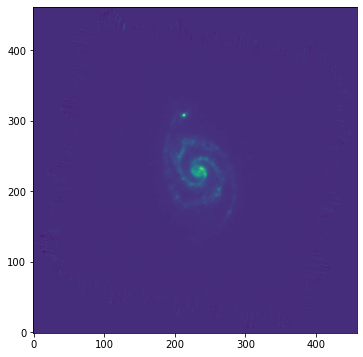

In [26]:
plt.imshow(image['HERSCHEL'][0]['160']['image'].data)

## Using PyVO

The PyVO package differs a bit from astroquery in that it does not have specialized sub-packages for different services. Instead, it implements and exposes the VO query standards. It is a lower level package that may require more knowledge about the VO, so it is not necessarily as user friendly as astroquery, but on the other hand it can work with any VO-compliant service. Astroquery is starting to use PyVO in places behind the scenes.

We can take a look at an example that consists of downloading the 2MASS images for the M17 region:

In [15]:
from astroquery.jplhorizons import Horizons

In [16]:
obj = Horizons(id='Ceres',location='568',epochs=2458133.33546)
print(obj)

JPLHorizons instance "Ceres"; location=568, epochs=[2458133.33546], id_type=smallbody


In [17]:
obj.ephemerides()

targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str17,str24,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1 Ceres (A801 AA),2018-Jan-14 20:03:03.744,2458133.33546,3.53,0.12,*,m,141.51866,27.97687,141.78435,27.89576,-22.0125,20.39799,306.541283,-13.199782,413.9,-682.23,-519374.55,176742.392,291.318,17.3018349135,999,--,7.291,6.557,99.39904,0.0049,562036.2,*,0.807913,330.609439,-8.681803,338.855294,-4.685907,79.35,0.06,11.5783,-0.369,127.2076,7.776,2.57596175446,-0.588356,1.64551557005437,-8.0581158,13.68533569,19.1879131,12.8033866,156.1212,/L,8.8967,132.8,4.512,14.9855,259.252,282.867,-3.52914,Leo,69.184341,135.276835,12.2295361,291.42763,66.76033,199.40599,44.825962,9.533381474,0.000355,0.0,0.0,0.00013,3e-05,83.526,0.0,0.0,0.0128,0.0,0.0,0.0,0.0,334.2965,7.8495452,8.8922,131.0862,10.0248


In [18]:
space_needle = {'lon': -122.3493,'lat':47.6205,'elevation':0}
obj1 = Horizons(id='Ceres',location=space_needle,epochs={'start': '2021-05-28','stop':'2021-06-05','step':'1d'})
print(obj1)

JPLHorizons instance "Ceres"; location={'lon': -122.3493, 'lat': 47.6205, 'elevation': 0}, epochs={'start': '2021-05-28', 'stop': '2021-06-05', 'step': '1d'}, id_type=smallbody


In [19]:
obj1.ephemerides()

targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str17,str17,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1 Ceres (A801 AA),2021-May-28 00:00,2459362.5,3.53,0.12,*,,37.13233,7.73169,37.40703,7.82417,53.68094,18.88233,272.356902,8.463128,655.26,-606.94,-92665.69,-49084.49,247.093,8.2269586049,6.442,1.811,9.359,6.855,99.22494,0.0028,107818.0,*,0.357512,51.326955,-1.190996,61.333723,0.425018,59.92,0.03,337.7425,-0.165,27.3205,-8.4852,2.885271756099,-1.1220645,3.71856851090642,-11.8165585,30.92639127,17.1514415,44.2392417,29.9494,/L,10.0967,128.1,96.3443,139.9571,239.852,243.728,-0.70474,Cet,69.185013,37.6129193,-6.5729068,291.42763,66.76033,160.387088,-47.956215,15.8893125482,0.000354,0.0,0.0,7e-05,1e-05,-69.223,0.0,0.0,0.013,0.0,0.0,0.0,0.0,232.8411,5.733156917,10.1014,32.3314,-7.5588
1 Ceres (A801 AA),2021-May-29 00:00,2459363.5,3.53,0.12,*,,37.49341,7.85795,37.76845,7.95004,53.63089,18.74809,272.901697,8.13511,655.14,-606.68,-94759.79,-49199.19,247.703,8.2926716847,6.672,1.876,9.362,6.862,99.1976,0.0029,109837.6,*,0.358193,283.140103,-1.168823,293.329968,0.408943,60.28,0.03,337.7855,-0.166,27.5178,-8.4634,2.884622839741,-1.1249833,3.7115050779073,-12.0243916,30.86764649,17.15547,44.1513456,30.5104,/L,10.2738,113.9,90.6422,139.219,240.215,243.77,-0.65929,Cet,69.18499,37.9948759,-6.567124,291.42763,66.76033,160.729396,-47.654409,15.8872126713,0.000354,0.0,0.0,7e-05,1e-05,-69.238,0.0,0.0,0.0129,0.0,0.0,0.0,0.0,233.0374,5.774774701,10.2785,32.621,-7.546
1 Ceres (A801 AA),2021-May-30 00:00,2459364.5,3.53,0.12,*,,37.85423,7.98333,38.12961,8.07502,53.57886,18.61297,273.445544,7.806478,655.06,-606.36,-96859.8,-49294.66,248.307,8.3583842731,6.92,1.945,9.365,6.868,99.16987,0.003,111860.7,*,0.358887,154.954578,-1.146185,165.326786,0.392857,60.64,0.03,337.8293,-0.166,27.7151,-8.4415,2.883972240562,-1.1278902,3.70432165537675,-12.2318707,30.80790378,17.15951,44.0622015,31.0724,/L,10.4504,100.2,82.9368,138.4805,240.57,243.812,-0.6135,Cet,69.184967,38.3761738,-6.5614498,291.42763,66.76033,161.06765,-47.352343,15.8849864447,0.000354,0.0,0.0,7e-05,1e-05,-69.255,0.0,0.0,0.0129,0.0,0.0,0.0,0.0,233.2339,5.81641008,10.4551,32.9104,-7.5333
1 Ceres (A801 AA),2021-May-31 00:00,2459365.5,3.53,0.12,*,,38.21477,8.10782,38.49048,8.1991,53.52458,18.47689,273.98849,7

<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)